<a href="https://colab.research.google.com/github/shishir-github/MMA2021/blob/master/860_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [113]:
df= pd.read_excel("updateddata.xlsx")

 **--- Fill the NAs with zeroes
--- Update the Yes to 1**
for columns
*"alcohol","redlight","ag_driv","speeding","passenger","emerg_veh","trsn_city_veh"* columns


In [114]:
cols = ["alcohol","redlight","ag_driv","speeding","passenger","emerg_veh","trsn_city_veh", \
    "truck","automobile","pedestrian"]
for col in cols:
  df[col].fillna(0,inplace=True)
  df[col].replace("Yes",1,inplace=True)

**Analysing the Missing data**

In [115]:
## Dropping Variables not needed for model
df.columns
cols = ['event_id','year','date','street1','street2','district','ward_num','division','latitude',\
        'loc_to_inter','hood_id','neighbourhood','minute','longitude','pedtype','drivact','drivcond',\
        'pedact','pedcond','cyclistype', 'fatal_no', 'Unnamed: 0']
df=df.drop(cols, axis=1)
df.head(2)

,hour,road_class,intersection,traffic_control,visibility,light,road_cond,acclass,impactype,invtype,age,injury,initdir,vehtype,manoeuver,cycact,cyccond,pedestrian,automobile,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol
0,18,Collector,Intersection,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Driver,65 to 69,None,North,"Automobile, Station Wagon",Turning Left,NaN,NaN,0,1,0,0,0,0,0,0,0,0
1,18,Collector,Intersection,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Cyclist,20 to 24,Major,South,Bicycle,Going Ahead,NaN,NaN,0,1,0,0,0,0,0,0,0,0


Filter the data by cyclist

In [116]:
## df1 has only rows where invtype is cyclist
df1=df.loc[df.invtype=='Cyclist']
df1.reset_index(drop=True, inplace=True)
df1.head(2)

,hour,road_class,intersection,traffic_control,visibility,light,road_cond,acclass,impactype,invtype,age,injury,initdir,vehtype,manoeuver,cycact,cyccond,pedestrian,automobile,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol
0,18,Collector,Intersection,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Cyclist,20 to 24,Major,South,Bicycle,Going Ahead,NaN,NaN,0,1,0,0,0,0,0,0,0,0
1,19,Major Arterial,Intersection,Traffic Signal,Clear,Dark,Wet,Non-Fatal Injury,Cyclist Collisions,Cyclist,25 to 29,Major,West,Bicycle,Going Ahead,Driving Properly,Normal,0,0,0,1,0,0,0,1,0,0


In [117]:
df1.shape
print(f"Columns:{df1.shape[0]}")
print(f"Rows:{df1.shape[1]}")

Columns:684
Rows:27


In [118]:
# Print the no of Null values
cols = df1.columns
for x in cols:
  n = df1[x].isnull().sum()
  if n>0:
    print(f"Total Null values in column {x} is {n}")

Total Null values in column intersection is 5
Total Null values in column initdir is 2
Total Null values in column vehtype is 3
Total Null values in column manoeuver is 2
Total Null values in column cycact is 18
Total Null values in column cyccond is 19


Fill the missing data

In [119]:
df1.fillna(value='unknown', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


CReate hour range categories from hour variable

In [120]:
df1['HourRange'] = ''
hour = df1.loc[:,'hour']
df1.loc[:,'HourRange'] = np.where((0<=hour) & (hour<=3),'Hour 0 to 3', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((4<=hour) & (hour<=7),'Hour 4 to 7', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((8<=hour) & (hour<=11),'Hour 8 to 11', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((12<=hour) & (hour<=15),'Hour 12 to 15', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((12<=hour) & (hour<=15),'Hour 12 to 15', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((16<=hour) & (hour<=19),'Hour 16 to 19', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((20<=hour) & (hour<=23),'Hour 20 to 23', df1.loc[:,'HourRange'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [121]:
df1.HourRange.value_counts()

Hour 16 to 19    201
Hour 12 to 15    160
Hour 8 to 11     137
Hour 20 to 23    104
Hour 4 to 7       51
Hour 0 to 3       31
Name: HourRange, dtype: int64

**Create Dummy variables** for "road_class","loc_to_inter","traffic_control","visibility","light", "road_cond", "acclass", "impactype","invtype", "injury", "initdir", "vehtype","manoeuver", "drivact", "drivcond", "pedtype", "pedact", "pedcond", "cycact", "cyccond", HourRange Columns


In [122]:
df1.road_class.value_counts()

Major Arterial    441
Minor Arterial    152
Collector          49
Local              42
Name: road_class, dtype: int64

In [123]:
all_cols = df1.columns
dummy_cols=["road_class","intersection","traffic_control","visibility","light", "road_cond", "acclass", "impactype",\
          "invtype", "initdir", "vehtype","manoeuver", "cycact", "cyccond"]
## Take the top 2 categories of the variable
top_2_lists =[]
for cols in dummy_cols:
  col_series = df[cols]
  top_2 = [x for x in col_series.value_counts().sort_values(ascending=False).head(2).index]
  top_2_lists.append(top_2)
## loop to create dummy variable columns for all the columns in the list..only top2 categories are used 
# in creating these dummy variables
i = 0
for cols in dummy_cols:
  new_l = top_2_lists[i]
  for label in new_l:
    df1[label+"_"+cols] = np.where(df1[cols]==label,1,0)
  i+=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [124]:
## CReate dummy variable  for HourRange colum
df1=pd.get_dummies(df1, columns=['HourRange'], drop_first=True, prefix_sep='_')

In [125]:
## Drop the original columns
dummy_cols =["road_class","intersection","traffic_control","visibility","light", "road_cond", "acclass", "impactype",\
          "invtype", "initdir", "vehtype","manoeuver", "cycact", "cyccond", 'hour']
df1.drop(dummy_cols, axis=1,inplace=True)
df1.head(1)

,age,injury,pedestrian,automobile,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,Dark_light,Dry_road_cond,Wet_road_cond,Non-Fatal Injury_acclass,Fatal_acclass,Cyclist Collisions_impactype,Pedestrian Collisions_impactype,Cyclist_invtype,Driver_invtype,East_initdir,West_initdir,Bicycle_vehtype,"Automobile, Station Wagon_vehtype",Going Ahead_manoeuver,Turning Left_manoeuver,Driving Properly_cycact,Disobeyed Traffic Control_cycact,Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11
0,20 to 24,Major,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


Create Prediction column **Fatal_Prediction** using Injury
For Injury = Fatal. Fatal is 1 otherwise 0

In [126]:
df1.injury.value_counts()

Major      618
Fatal       37
None        15
Minor        7
Minimal      7
Name: injury, dtype: int64

In [127]:
df1['Fatal_Prediction']= np.where(df1['injury']=='Fatal',1,0)
#drop injury
df1.drop(['injury'],axis=1,inplace=True)
df1.head(2)

,age,pedestrian,automobile,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,Dark_light,Dry_road_cond,Wet_road_cond,Non-Fatal Injury_acclass,Fatal_acclass,Cyclist Collisions_impactype,Pedestrian Collisions_impactype,Cyclist_invtype,Driver_invtype,East_initdir,West_initdir,Bicycle_vehtype,"Automobile, Station Wagon_vehtype",Going Ahead_manoeuver,Turning Left_manoeuver,Driving Properly_cycact,Disobeyed Traffic Control_cycact,Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11,Fatal_Prediction
0,20 to 24,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,25 to 29,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0


In [128]:
#create continous value for Age and drop the original columns
age = pd.DataFrame(df1['age'])
age['age'].replace(['unknown'],[''],inplace=True)
new_age = age['age'].str.split(" ", expand=True)
new_age = new_age.drop(new_age.columns[1], axis=1)
new_age = new_age.apply(pd.to_numeric, errors='coerce')
new_age['Age'] = new_age.mean(axis=1)
df1.insert(df1.columns.get_loc("age"), "New_Age", new_age['Age'])
df1.drop('age',axis=1,inplace=True)

In [129]:
df1.reset_index(drop=True).head(2)

,New_Age,pedestrian,automobile,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,Dark_light,Dry_road_cond,Wet_road_cond,Non-Fatal Injury_acclass,Fatal_acclass,Cyclist Collisions_impactype,Pedestrian Collisions_impactype,Cyclist_invtype,Driver_invtype,East_initdir,West_initdir,Bicycle_vehtype,"Automobile, Station Wagon_vehtype",Going Ahead_manoeuver,Turning Left_manoeuver,Driving Properly_cycact,Disobeyed Traffic Control_cycact,Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11,Fatal_Prediction
0,22.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,27.0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0


In [130]:
df1.isnull().sum()

New_Age                              4
pedestrian                           0
automobile                           0
truck                                0
trsn_city_veh                        0
emerg_veh                            0
passenger                            0
speeding                             0
ag_driv                              0
redlight                             0
alcohol                              0
Major Arterial_road_class            0
Minor Arterial_road_class            0
Intersection_intersection            0
Mid-Block_intersection               0
No Control_traffic_control           0
Traffic Signal_traffic_control       0
Clear_visibility                     0
Rain_visibility                      0
Daylight_light                       0
Dark_light                           0
Dry_road_cond                        0
Wet_road_cond                        0
Non-Fatal Injury_acclass             0
Fatal_acclass                        0
Cyclist Collisions_impact

In [131]:
## fill the 4 missing age 
df1.fillna(value=np.mean(df1['New_Age']), inplace=True)

**Peform oversampling using SMOTE to balance the data**

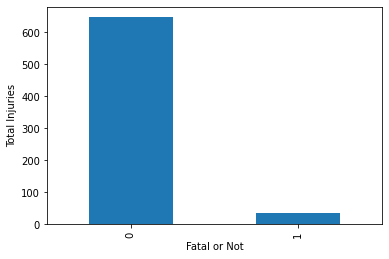

In [132]:
df1['Fatal_Prediction'].value_counts().plot(kind='bar')
plt.xlabel("Fatal or Not")
plt.ylabel("Total Injuries")
plt.xticks()
plt.show()

In [133]:
# SPlit the dataframe into X and Y ..X is the depednet and Y is independent variable
X = df1.iloc[:, :-1]
Y = df1.iloc[:, -1]
# Save the columns name in X_columns variable
X_Columns = list(X.columns)
print(X_Columns)
len(X_Columns)

['New_Age', 'pedestrian', 'automobile', 'truck', 'trsn_city_veh', 'emerg_veh', 'passenger', 'speeding', 'ag_driv', 'redlight', 'alcohol', 'Major Arterial_road_class', 'Minor Arterial_road_class', 'Intersection_intersection', 'Mid-Block_intersection', 'No Control_traffic_control', 'Traffic Signal_traffic_control', 'Clear_visibility', 'Rain_visibility', 'Daylight_light', 'Dark_light', 'Dry_road_cond', 'Wet_road_cond', 'Non-Fatal Injury_acclass', 'Fatal_acclass', 'Cyclist Collisions_impactype', 'Pedestrian Collisions_impactype', 'Cyclist_invtype', 'Driver_invtype', 'East_initdir', 'West_initdir', 'Bicycle_vehtype', 'Automobile, Station Wagon_vehtype', 'Going Ahead_manoeuver', 'Turning Left_manoeuver', 'Driving Properly_cycact', 'Disobeyed Traffic Control_cycact', 'Normal_cyccond', 'Inattentive_cyccond', 'HourRange_Hour 12 to 15', 'HourRange_Hour 16 to 19', 'HourRange_Hour 20 to 23', 'HourRange_Hour 4 to 7', 'HourRange_Hour 8 to 11']


44

**Split the data into Train and Test sets**

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=101)
print(f"X Train shape {X_train.shape}")
print(f"X Test shape {X_test.shape}")
print(f"y Train shape {y_train.shape}")
print(f"y Test shape {y_train.shape}")

X_train.head(2)

X Train shape (513, 44)
X Test shape (171, 44)
y Train shape (513,)
y Test shape (513,)


,New_Age,pedestrian,automobile,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,Dark_light,Dry_road_cond,Wet_road_cond,Non-Fatal Injury_acclass,Fatal_acclass,Cyclist Collisions_impactype,Pedestrian Collisions_impactype,Cyclist_invtype,Driver_invtype,East_initdir,West_initdir,Bicycle_vehtype,"Automobile, Station Wagon_vehtype",Going Ahead_manoeuver,Turning Left_manoeuver,Driving Properly_cycact,Disobeyed Traffic Control_cycact,Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11
617,37.0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
336,22.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0


In [135]:
## 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 12, ratio=0.25)
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)

print(f"X Train shape after sampling {X_train_res.shape}")
print(f"y train shape fter sampling  {y_train_res.shape}")


X Train shape after sampling (603, 44)
y train shape fter sampling  (603,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [136]:
## Check the Y column (which is Fatal_prediction).. Y column should have balanced 1's and 0's (1 is to 4 ratio)
X_train_res.shape, y_train_res.shape
import collections as cl
cl.Counter(y_train_res)

Counter({0: 483, 1: 120})

**Import Logistic model function and train the data on training set in the model**


In [137]:
from statsmodels.discrete import discrete_model as sm
model = sm.Logit(y_train_res,X_train_res)
result = model.fit()
##** The model is giving error "Perfect separation detected, results not available".
## we may have some variables which are highly imbalanced..Drop highly imbalanced variables

PerfectSeparationError: ignored

In [138]:
# Create a list which has the count of 0s and 1s in all columns
lst = []
for x in range(0,X_train_res.shape[1]):
  lst.append(cl.Counter(X_train_res[:,x]))
len(lst)

44

In [139]:
## Drop columns which has more than 80% 1s or 0s
# Create list of columns dropped and not dropped. The list has the index of these columns
drop_ind=[]
left_ind=[]
for x in range(0,len(lst)):
  if len(lst[x])==1:
    drop_ind.append(x)
  elif len(lst[x])==2:
    if (lst[x][0]/X_train_res.shape[0] > 0.8) or (lst[x][0]/X_train_res.shape[0] < 0.2):
      drop_ind.append(x)
    else:
      left_ind.append(x) 
  else:
    left_ind.append(x)        
print(f"Columns dropped : {drop_ind}")
print(f"Columns not dropped : {left_ind}")

Columns dropped : [1, 5, 23, 24, 25, 26, 27, 28, 31, 32]
Columns not dropped : [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


In [140]:
## delet the drop_ind indexes from X_res..we drop 10 columns which has huge class imbalance
print(X_train_res.shape)
print(X_test.shape)
X_train_res1=np.delete(X_train_res,[drop_ind],axis=1)
X_test1 = X_test.drop(X_test.iloc[:,drop_ind], axis=1)
print(f"After drop :{X_train_res1.shape}")
print(f"After drop : {X_test1.shape}")

(603, 44)
(171, 44)
After drop :(603, 34)
After drop : (171, 34)


In [141]:
## Covert the X_train_res and Y_train_res to a dataframe with column labels
# We have the list of all columns in X_columns variables
# Remove the the columns dropped based on index
for x in drop_ind:
  X_Columns.pop(x)
print(X_Columns)
len(X_Columns)
# Total columns left in X are 34 and X_columns has the list of all columns

['New_Age', 'automobile', 'truck', 'trsn_city_veh', 'emerg_veh', 'speeding', 'ag_driv', 'redlight', 'alcohol', 'Major Arterial_road_class', 'Minor Arterial_road_class', 'Intersection_intersection', 'Mid-Block_intersection', 'No Control_traffic_control', 'Traffic Signal_traffic_control', 'Clear_visibility', 'Rain_visibility', 'Daylight_light', 'Dark_light', 'Dry_road_cond', 'Wet_road_cond', 'Non-Fatal Injury_acclass', 'Fatal_acclass', 'Pedestrian Collisions_impactype', 'Driver_invtype', 'West_initdir', 'Automobile, Station Wagon_vehtype', 'Turning Left_manoeuver', 'Disobeyed Traffic Control_cycact', 'Normal_cyccond', 'Inattentive_cyccond', 'HourRange_Hour 16 to 19', 'HourRange_Hour 4 to 7', 'HourRange_Hour 8 to 11']


34

In [142]:
### Add constatnt in X for the intercept
import statsmodels.tools as c
X_train_res1 = c.add_constant(X_train_res1)

In [ ]:
X_train_res1.shape

In [143]:
### Putting the X_train_res1 array into a dataframe..in order to have a clear column label
X_Columns.insert(0, 'constant')
print(X_train_res1.shape)
X_train_res_df=pd.DataFrame(data=X_train_res1, index=range(0,X_train_res1.shape[0]), columns=[X_Columns])
X_train_res_df.head(2)
print(X_train_res_df.shape)

(603, 35)
(603, 35)


In [145]:
## train the logistic reg model on new set of X variables
from statsmodels.discrete import discrete_model as sm
model2 = sm.Logit(y_train_res,X_train_res_df)
result2 = model2.fit()
print(result2.summary())

         Current function value: 0.302932
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  603
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           34
Date:                Tue, 04 Aug 2020   Pseudo R-squ.:                  0.3929
Time:                        12:21:38   Log-Likelihood:                -182.67
converged:                      False   LL-Null:                       -300.91
Covariance Type:            nonrobust   LLR p-value:                 3.587e-32
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
constant                            -47.9193   1.56e+04     -0.003      0.998   -3.05e+04    3.04e

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


***In progress  - Need to create new model by removing the insignificant ones*****


Calculating the Accuracy of the Model by testing on the test data set 

In [ ]:
X_test1=pd.DataFrame.to_numpy(X_test1)

In [ ]:
y_test_pred = model2.predict(X_test1)